In [138]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy import stats

1- DF inflacion

In [139]:
df_ingresos = pd.read_csv("ETL ADA\df_ingresos.csv")

In [140]:
df_ingresos

,country,tipo_ingreso
0,Antigua y Barbuda,alto
1,Argentina,mediano alto
2,Bahamas,alto
3,Barbados,alto
4,Belice,mediano alto
5,Bolivia,mediano bajo
6,Brasil,mediano alto
7,Canadá,alto
8,Chile,alto
9,Colombia,mediano alto


In [141]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       33 non-null     object
 1   tipo_ingreso  33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [142]:
#Contamos los nulos por columnas, 
print(df_ingresos.isna().sum(axis=0))

country         0
tipo_ingreso    0
dtype: int64


In [143]:
# analisis de distribucion

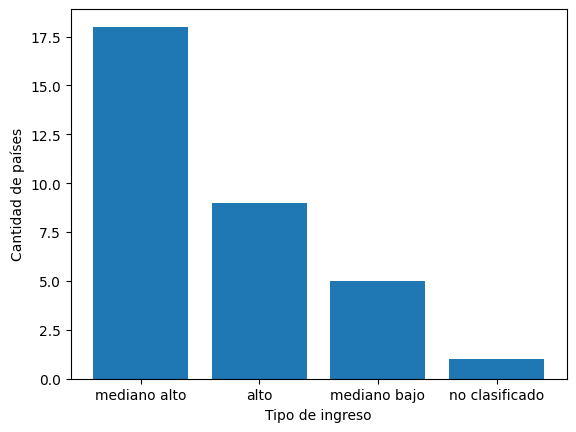

In [144]:
# histogramas

# Crear un DataFrame con los datos
data = {'country': ['Antigua y Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belice', 'Bolivia', 'Brasil', 'Canadá', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Estados Unidos', 'Granada', 'Guatemala', 'Guyana', 'Haití', 'Honduras', 'Jamaica', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'República Dominicana', 'San Vicente y las Granadinas', 'Santa Lucía', 'Trinidad y Tobago', 'Uruguay', 'Venezuela'],
        'tipo_ingreso': ['alto', 'mediano alto', 'alto', 'alto', 'mediano alto', 'mediano bajo', 'mediano alto', 'alto', 'alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano bajo', 'alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano bajo', 'mediano bajo', 'mediano alto', 'mediano alto', 'mediano bajo', 'alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'alto', 'alto', 'no clasificado']}
df = pd.DataFrame(data)

# Contar la cantidad de veces que aparece cada tipo de ingreso
counts = df['tipo_ingreso'].value_counts()

# Crear el histograma
plt.bar(counts.index, counts.values)

# Etiquetar los ejes
plt.xlabel('Tipo de ingreso')
plt.ylabel('Cantidad de países')

# Mostrar el histograma
plt.show()

In [145]:
# clasificamos los paises 

# Crear un DataFrame con los datos
data = {'country': ['Antigua y Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belice', 'Bolivia', 'Brasil', 'Canadá', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 'Estados Unidos', 'Granada', 'Guatemala', 'Guyana', 'Haití', 'Honduras', 'Jamaica', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'República Dominicana', 'San Vicente y las Granadinas', 'Santa Lucía', 'Trinidad y Tobago', 'Uruguay', 'Venezuela'],
        'tipo_ingreso': ['alto', 'mediano alto', 'alto', 'alto', 'mediano alto', 'mediano bajo', 'mediano alto', 'alto', 'alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano bajo', 'alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano bajo', 'mediano bajo', 'mediano alto', 'mediano alto', 'mediano bajo', 'alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'mediano alto', 'alto', 'alto', 'no clasificado']}
df = pd.DataFrame(data)

# Crear listas para cada categoría de ingreso
alto = []
mediano_alto = []
mediano_bajo = []
no_clasificado = []

# Iterar sobre cada fila del DataFrame y agregar el país a la lista correspondiente
for index, row in df.iterrows():
    if row['tipo_ingreso'] == 'alto':
        alto.append(row['country'])
    elif row['tipo_ingreso'] == 'mediano alto':
        mediano_alto.append(row['country'])
    elif row['tipo_ingreso'] == 'mediano bajo':
        mediano_bajo.append(row['country'])
    elif row['tipo_ingreso'] == 'no clasificado':
        no_clasificado.append(row['country'])

# Mostrar las listas de países en cada categoría de ingreso
print('Países con ingreso alto:', alto)
print('Países con ingreso mediano alto:', mediano_alto)
print('Países con ingreso mediano bajo:', mediano_bajo)
print('Países con ingreso no clasificado:', no_clasificado)

Países con ingreso alto: ['Antigua y Barbuda', 'Bahamas', 'Barbados', 'Canadá', 'Chile', 'Estados Unidos', 'Panamá', 'Trinidad y Tobago', 'Uruguay']
Países con ingreso mediano alto: ['Argentina', 'Belice', 'Brasil', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'Granada', 'Guatemala', 'Guyana', 'Jamaica', 'México', 'Paraguay', 'Perú', 'República Dominicana', 'San Vicente y las Granadinas', 'Santa Lucía']
Países con ingreso mediano bajo: ['Bolivia', 'El Salvador', 'Haití', 'Honduras', 'Nicaragua']
Países con ingreso no clasificado: ['Venezuela']


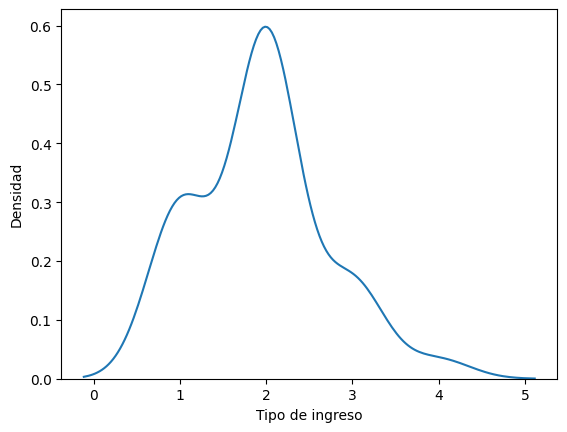

In [146]:
# garficas de densidad 

# Convertir la variable categórica en una variable numérica
df_ingresos["tipo_ingreso_num"] = df_ingresos["tipo_ingreso"].replace({
    "alto": 1,
    "mediano alto": 2,
    "mediano bajo": 3,
    "no clasificado": 4
})

# Crear el gráfico de densidad
sns.kdeplot(df_ingresos["tipo_ingreso_num"])

# Establecer las etiquetas de los ejes
plt.xlabel("Tipo de ingreso")
plt.ylabel("Densidad")

# Mostrar el gráfico
plt.show()

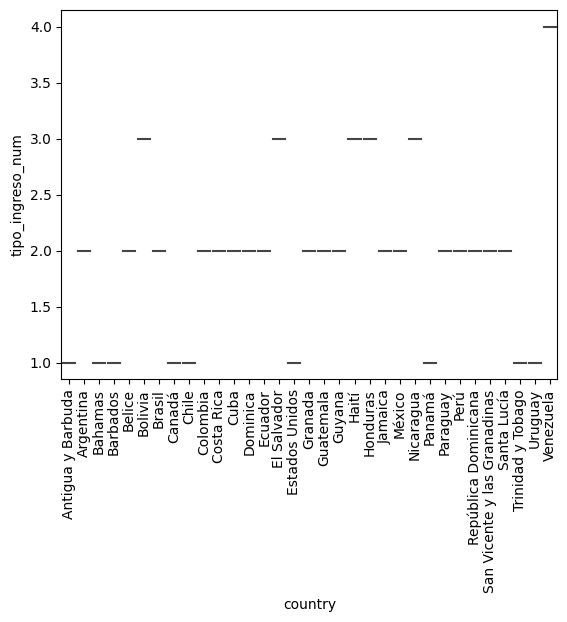

In [147]:
# Crear la gráfica de violín con los datos rotados del eje X
sns.violinplot(x='country', y='tipo_ingreso_num', data=df_ingresos)
plt.xticks(rotation=90)
plt.show()

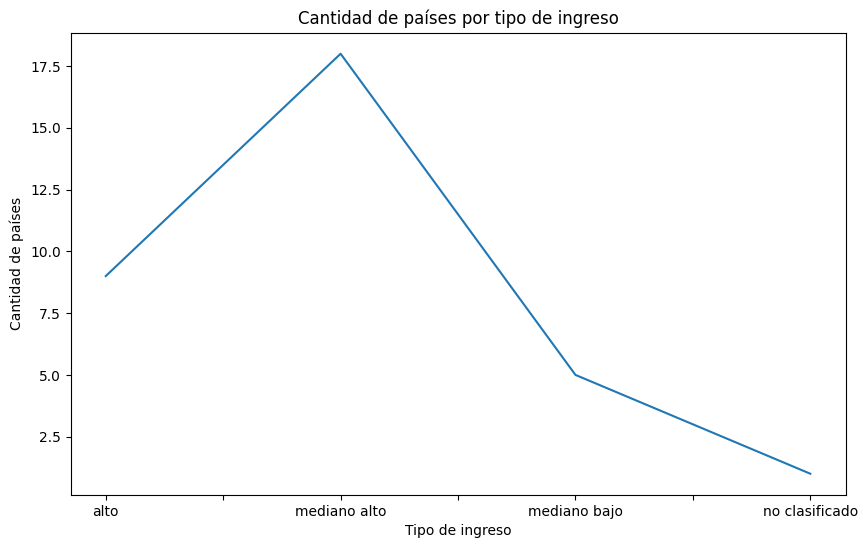

In [148]:
#diagrama de lineas 

df_ingresos.groupby('tipo_ingreso').count()['country'].plot(kind='line', figsize=(10,6))
plt.title('Cantidad de países por tipo de ingreso')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Cantidad de países')
plt.show()

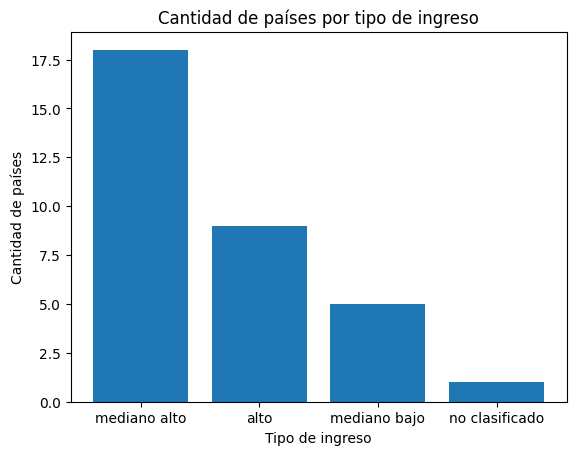

In [149]:
# diagrama de barras 


# Contar la cantidad de países por tipo de ingreso
counts = df_ingresos['tipo_ingreso'].value_counts()

# Graficar el resultado
plt.bar(counts.index, counts.values)
plt.title('Cantidad de países por tipo de ingreso')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Cantidad de países')
plt.show()




In [150]:
# analisis de outliers

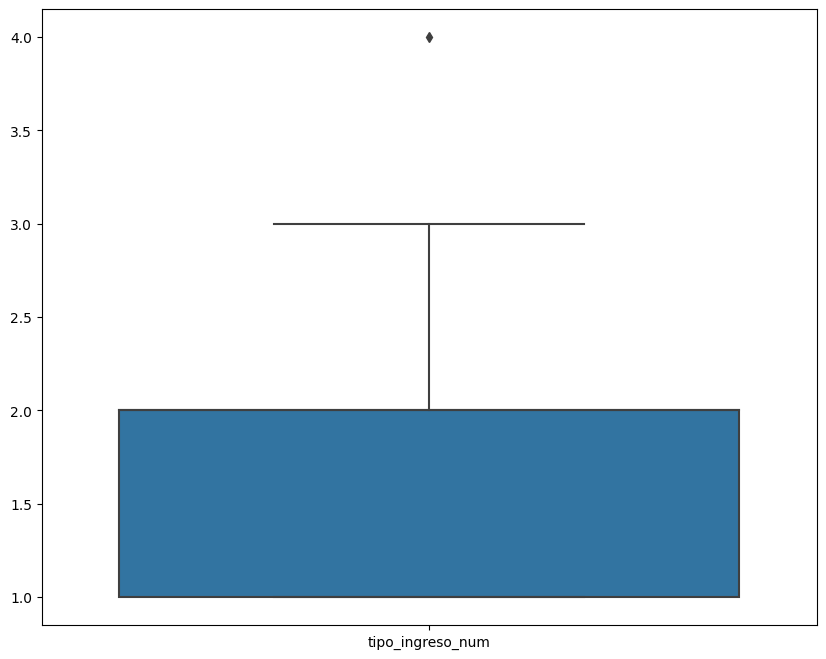

In [151]:
# Creamos un boxplot de Seaborn:

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_ingresos.iloc[:,1:])

# Mostramos el gráfico:

plt.show()

In [152]:


column = 'tipo_ingreso_num'

# Calculamos el rango intercuartil (IQR)
Q1 = df_ingresos[column].quantile(0.25)
Q3 = df_ingresos[column].quantile(0.75)
IQR = Q3 - Q1

# Identificamos los outliers
outliers = df_ingresos[(df_ingresos[column] < Q1 - 1.5 * IQR) | (df_ingresos[column] > Q3 + 1.5 * IQR)]

# Mostramos los outliers
print(outliers)

    

      country    tipo_ingreso  tipo_ingreso_num
32  Venezuela  no clasificado                 4


In [153]:
# Comprender la causa de los outliers:



In [154]:
# matriz de correlacion 

In [157]:
df_ingresos

,country,tipo_ingreso,tipo_ingreso_num
0,Antigua y Barbuda,alto,1
1,Argentina,mediano alto,2
2,Bahamas,alto,1
3,Barbados,alto,1
4,Belice,mediano alto,2
5,Bolivia,mediano bajo,3
6,Brasil,mediano alto,2
7,Canadá,alto,1
8,Chile,alto,1
9,Colombia,mediano alto,2


C:\Users\alekz\AppData\Local\Temp\ipykernel_20892\1447214538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_ingresos.corr()


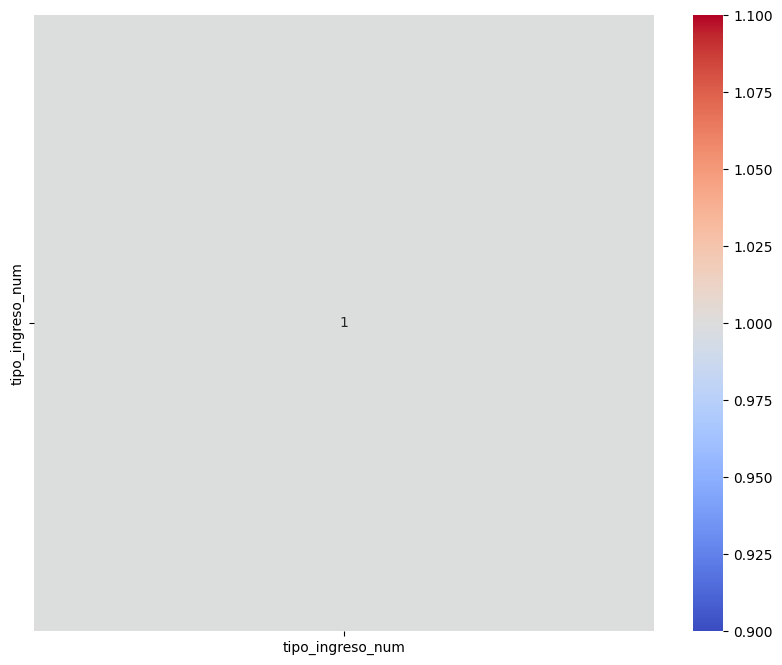

In [155]:
# Calculamos la matriz de correlación
corr_matrix = df_ingresos.corr()

# Visualizamos la matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [156]:
# Resumen de atributos numéricos para variables continuas
df_ingresos.describe()

,tipo_ingreso_num
count,33.000000
mean,1.939394
std,0.747470
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000
